Without Using Regression Model

In [44]:
import pandas as pd
import numpy as np
from statistics import stdev,mean

In [45]:
df = pd.read_excel('real+estate+valuation+data+set/Real estate valuation data set.xlsx')

In [46]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [47]:
df.rename(columns = {'X1 transaction date':'Date',
                    'X2 house age':'Age',
                    'X3 distance to the nearest MRT station':'Distance to MRT Station',
                    'X4 number of convenience stores':'Convenience',
                    'X5 latitude':'Latitude',
                    'X6 longitude':'Longitude',
                    'Y house price of unit area':'Price'}, inplace = True)

In [48]:
df.head()

,No,Date,Age,Distance to MRT Station,Convenience,Latitude,Longitude,Price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [49]:
df.drop(columns=['No'], inplace = True)
df

,Date,Age,Distance to MRT Station,Convenience,Latitude,Longitude,Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [50]:
def standard_units(x):
    return (x - np.average(x))/np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t[x])
    y_su = standard_units(t[y])
    return np.average(x_su * y_su)

def slope(t, x, y):
    r = correlation(t, x, y)
    return r * np.std(t[y])/np.std(t[x])

def intercept(t, x, y):
    a = slope(t, x, y)
    return np.average(t[y]) - a*np.average(t[x])

In [51]:
def predict(x):
    s_i1 = correlation(x,'Date','Price') * np.std(x['Price'])/np.std(x['Date'])
    s_i2 = correlation(x,'Age','Price') * np.std(x['Price'])/np.std(x['Age'])
    s_i3 = correlation(x,'Distance to MRT Station','Price') * np.std(x['Price'])/np.std(x['Distance to MRT Station'])
    s_i4 = correlation(x,'Convenience','Price') * np.std(x['Price'])/np.std(x['Convenience'])
    s_i5 = correlation(x,'Latitude','Price') * np.std(x['Price'])/np.std(x['Latitude'])
    s_i6 = correlation(x,'Longitude','Price') * np.std(x['Price'])/np.std(x['Longitude'])


    intercept = np.average(x['Price']) - [
        (s_i1 * np.average(x['Date'])) + (s_i2 * np.average( x['Age'] ) ) + (s_i3 * np.average(x['Distance to MRT Station'])) + (s_i4 * np.average(x['Convenience'])) + (s_i5 * np.average(x['Latitude'])) + (s_i6 * np.average(x['Longitude']))]

    return s_i1 * x['Date'] + s_i2 * x['Age'] + s_i3 * x['Distance to MRT Station'] + s_i4 * x['Convenience'] + s_i5 * x['Latitude'] + s_i6 * x['Longitude'] + intercept

In [52]:
df.columns

Index(['Date', 'Age', 'Distance to MRT Station', 'Convenience', 'Latitude',
       'Longitude', 'Price'],
      dtype='object')

In [53]:
predicted_values = predict(df)
predicted_values

0      67.785256
1      64.761147
2      63.036644
3      62.684698
4      57.678317
         ...    
409   -24.380904
410    66.836334
411    59.954454
412    51.287013
413    70.129455
Length: 414, dtype: float64

In [54]:
predicted_values = predicted_values.to_frame()

In [55]:
predicted_values

,0
0,67.785256
1,64.761147
2,63.036644
3,62.684698
4,57.678317
...,...
409,-24.380904
410,66.836334
411,59.954454
412,51.287013


In [56]:
def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

In [57]:
mse = mean_squared_error(predicted_values[0],df['Price'])

In [58]:
mse

338.107462512296

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
# Load the dataset
data = 'real+estate+valuation+data+set/Real estate valuation data set.xlsx'
df = pd.read_excel(data)

target_col = df.columns[-1]

predictor_cols = df.columns[1:6]  

X = df[predictor_cols]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train_std = (X_train - X_train.mean()) / X_train.std()
X_test_std = (X_test - X_train.mean()) / X_train.std()
y_train_std = (y_train - y_train.mean()) / y_train.std()

In [62]:
model = LinearRegression()
model.fit(X_train_std, y_train_std)

y_pred_std = model.predict(X_test_std)

y_pred = y_pred_std * y_train.std() + y_train.mean()

In [63]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 53.161525002800815
Root Mean Squared Error (RMSE): 7.291195032558162
R-squared (R2): 0.6831091680854111


In [64]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions)

     Actual  Predicted
358    45.1  47.805444
350    42.3  41.083404
373    52.2  43.902708
399    37.3  39.783947
369    22.8  27.223685
..      ...        ...
31     25.0  40.369595
283    23.5  32.965700
157    35.6  42.295057
203    46.1  43.447297
208    26.2  28.894718

[83 rows x 2 columns]


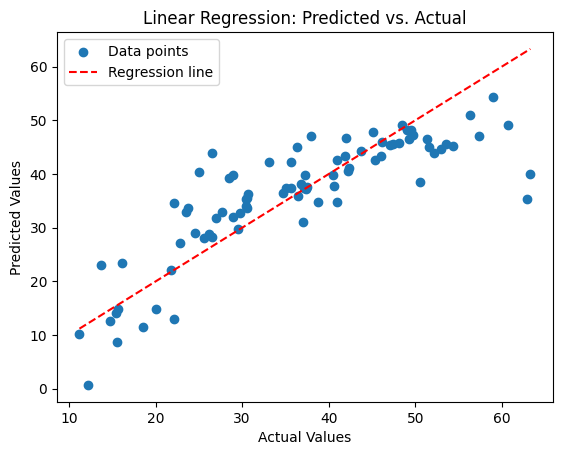

In [65]:
plt.scatter(y_test, y_pred, label='Data points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Regression line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predicted vs. Actual")
plt.legend()
plt.show()